#### imports  from a raw subfile



In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
from matplotlib.patches import Circle
import matplotlib.tri as tri
import numpy as np
from scipy.spatial.transform import Rotation as R
from statistics import mean
import math

root = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Data/Raw/'
figures = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Figures/'

#Data with beacon metadata
beacon = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)
beacon2 = pd.read_csv(root+'beacons 20200128-160013.txt',sep=" ", header=None)

Day46_fs1 = pd.read_csv(root+'position 20190923-174441.txt',sep=" ", header=None)
Day46_fs2 = pd.read_csv(root+'position 20190923-171112.txt',sep=" ", header=None)
Day47_fs1 = pd.read_csv(root+'position 20191001-112411.txt',sep=" ", header=None)
Day47_fs2 = pd.read_csv(root+'position 20191001-115127.txt',sep=" ", header=None)
Day48_fs1 = pd.read_csv(root+'position 20191002-115000.txt',sep=" ", header=None)
Day48_fs2 = pd.read_csv(root+'position 20191002-111038.txt',sep=" ", header=None)
Day51_fs1 = pd.read_csv(root+'position 20191106-170809.txt',sep=" ", header=None)
Day52_fs2 = pd.read_csv(root+'position 20191107-174215.txt',sep=" ", header=None)
Day52_fs1 = pd.read_csv(root+'position 20191107-183857.txt',sep=" ", header=None)
Day53_fs2 = pd.read_csv(root+'position 20191108-142321.txt',sep=" ", header=None)
Day53_fs1 = pd.read_csv(root+'position 20191108-145125.txt',sep=" ", header=None)
Day66_fs1 = pd.read_csv(root+'position 20191118-161325.txt',sep=" ", header=None)
Day66_fs2 = pd.read_csv(root+'position 20191118-171209.txt',sep=" ", header=None)
Day72_fs1 = pd.read_csv(root+'position 20191127-122008.txt',sep=" ", header=None)
Day72_fs2 = pd.read_csv(root+'position 20191127-132223.txt',sep=" ", header=None)


Day79_fs2 = pd.read_csv(root+'position 20200121-154004.txt',sep=" ", header=None)
Day79_fs1 = pd.read_csv(root+'position 20200121-161359.txt',sep=" ", header=None)

Day80_fs2 = pd.read_csv(root+'position 20200122-141738.txt',sep=" ", header=None)
Day80_fs1 = pd.read_csv(root+'position 20200122-133022.txt',sep=" ", header=None)

Day81_fs2 = pd.read_csv(root+'position 20200123-141930.txt',sep=" ", header=None)
Day81_fs1 = pd.read_csv(root+'position 20200123-150059.txt',sep=" ", header=None)

Day82_fs2 = pd.read_csv(root+'position 20200124-151642.txt',sep=" ", header=None)
Day82_fs1 = pd.read_csv(root+'position 20200124-160826.txt',sep=" ", header=None)

Day83_fs2 = pd.read_csv(root+'position 20200126-183810.txt',sep=" ", header=None)
Day83_fs1 = pd.read_csv(root+'position 20200126-180200.txt',sep=" ", header=None)

Day84_fs2 = pd.read_csv(root+'position 20200127-205615.txt',sep=" ", header=None)
Day84_fs1 = pd.read_csv(root+'position 20200127-155645.txt',sep=" ", header=None)

Day85_fs2 = pd.read_csv(root+'position 20200128-112255.txt',sep=" ", header=None)
Day85_fs1 = pd.read_csv(root+'position 20200128-104637.txt',sep=" ", header=None)

Day86_fs2 = pd.read_csv(root+'position 20200128-160013.txt',sep=" ", header=None)
Day86_fs1 = pd.read_csv(root+'position 20200128-151826.txt',sep=" ", header=None)

Day87_fs2 = pd.read_csv(root+'position 20200129-153534.txt',sep=" ", header=None)
Day87_fs1 = pd.read_csv(root+'position 20200129-161806.txt',sep=" ", header=None)

Day88_fs2 = pd.read_csv(root+'position 20200130-102126.txt',sep=" ", header=None)
Day88_fs1 = pd.read_csv(root+'position 20200130-111741.txt',sep=" ", header=None)

Day89_fs2 = pd.read_csv(root+'position 20200130-161126.txt',sep=" ", header=None)
Day89_fs1 = pd.read_csv(root+'position 20200130-151829.txt',sep=" ", header=None)

Day90_fs2 = pd.read_csv(root+'position 20200203-154441.txt',sep=" ", header=None)
Day90_fs1 = pd.read_csv(root+'position 20200203-145842.txt',sep=" ", header=None)

Day91_fs2 = pd.read_csv(root+'position 20200204-125552.txt',sep=" ", header=None)
Day91_fs1 = pd.read_csv(root+'position 20200204-133905.txt',sep=" ", header=None)

Day92_fs2 = pd.read_csv(root+'position 20200205-143220.txt',sep=" ", header=None)
Day92_fs1 = pd.read_csv(root+'position 20200205-151052.txt',sep=" ", header=None)

Day93_fs2 = pd.read_csv(root+'position 20200206-133529.txt',sep=" ", header=None)
Day93_fs1 = pd.read_csv(root+'position 20200206-125706.txt',sep=" ", header=None)



## Function to visualize particular days with heatmaps.

### How to use: Take a position and name it Day#_AnimalID then run rotation_correction (Day#_AnimalID, Day#_AnimalID2)

In [4]:
def rotation_correction(Day_fs1,Day_fs2,day):
    alpha = (5) * np.pi / 180
    Day_fs1x = Day_fs1[1] * np.cos(alpha) - Day_fs1[3] * np.sin(alpha)
    Day_fs1y = Day_fs1[1] * np.sin(alpha) + Day_fs1[3] * np.cos(alpha)
    Day_fs2x = Day_fs2[1] * np.cos(alpha) - Day_fs2[3] * np.sin(alpha)
    Day_fs2y = Day_fs2[1] * np.sin(alpha) + Day_fs2[3] * np.cos(alpha)
    
    fig,ax = plt.subplots(1,2)
    #fig.set_size_inches( 7.2/2,16.2/2)
    plt.xticks([])
    
    ax[0].hist2d(Day_fs1x,Day_fs1y,bins = 30,cmap='terrain',cmax=1000 )
    ax[0].plot(Day_fs1x,Day_fs1y,color='olive',alpha=.6)


    ax[1].hist2d(Day_fs2x,Day_fs2y,bins = 30,cmap='terrain',cmax=1000 )
    ax[1].plot(Day_fs2x,Day_fs2y,color='olive',alpha=.6)
    
    
    #ax[0].add_patch(mpl.patches.Circle((-.3429, 0.2),.15,edgecolor='red', fill = False,linestyle='--',linewidth=2))
    #ax[1].add_patch(mpl.patches.Circle((-.3429, 0.2),.15,edgecolor='red', fill = False,linestyle='--',linewidth=2))
    ax[0].set_title('FS1', fontsize=10)
    ax[1].set_title('FS2', fontsize=10)
    ax[0].set_ylabel('Day %s ' %day)
    ax[0].set_xticks([])
    ax[1].set_xticks([])
    
    fig.dpi=200
    plt.tight_layout()
    plt.show()
    


In [5]:
#rotation_correction(Day72_fs1,Day72_fs2,72)

In [6]:
#rotation_correction(Day46_fs1,Day46_fs2,46)

In [7]:
#rotation_correction(Day52_fs1,Day52_fs2,52) 

In [8]:
#rotation_correction(Day66_fs1[1200:6800],Day66_fs2[1200:6800],66) 

## recording speed :  100 hz

## Calculate speed and distance for each then plot over time. - DONE 
    

In [9]:
def calculateDistance(x,y): 
    travel=0
    for i in range(len(y)-1):
        dist = math.sqrt((x[0+i] - x[1+i])**2 + (y[0+i] - y[1+i])**2)
        travel+=dist
        
    return travel  



from statistics import mean

def calculateSpeed(x,y,time): 
    travel=0
    speed=[] 
    for i in range(len(y)-1):
        dist = math.sqrt((x[0+i] - x[1+i])**2 + (y[0+i] - y[1+i])**2)/time
        speed.append(dist)   
    return (np.mean(speed)) 
    
import numpy
Day79_fs1[0][1]-Day79_fs1[0][0]
time = 0.01

    
# average speed per minute in meters
print (100* calculateSpeed(Day79_fs1[1],Day79_fs1[3],time))
print(time)


26.944251554109282
0.01


## Long-term distance visualization 

In [10]:
def Distance_over_days (list_of_fs1_days,list_of_fs2_days,list_of_number_of_days) :
    """this function takes lists of days for each animal and plots a distance covered over time. """
    
    LT_distance_fs1 = []
    for day in list_of_fs1_days:
        LT_distance_fs1.append (calculateDistance(list(day[1]),list(day[3])))
    
    LT_distance_fs2 = []
    for day in list_of_fs2_days:
        LT_distance_fs2.append (calculateDistance(list(day[1]),list(day[3])))
    
    x = np.arange(len(list_of_number_of_days))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(dpi= 1000)
    FS1 = ax.bar(x - width/2, LT_distance_fs1, width, label='FS1')
    FS2 = ax.bar(x + width/2, LT_distance_fs2, width, label='FS2')

   
    ax.set_ylabel('meters')
    ax.set_xlabel('Day')
    ax.set_title('Total distance by animal')
    ax.set_xticks(x)
    ax.set_xticklabels(list_of_number_of_days)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(int(height)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 0),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(FS1)
    autolabel(FS2)

    fig.tight_layout()
    plt.savefig(figures+'distance_over_days_'+Day_number_list[0]+'-'+Day_number_list[-1]+'.png', dpi = 1000)
    plt.show()

## Calculating LT averges for Days 79-90 - times when beacon appearance and randomization of place frequencey was increasing 

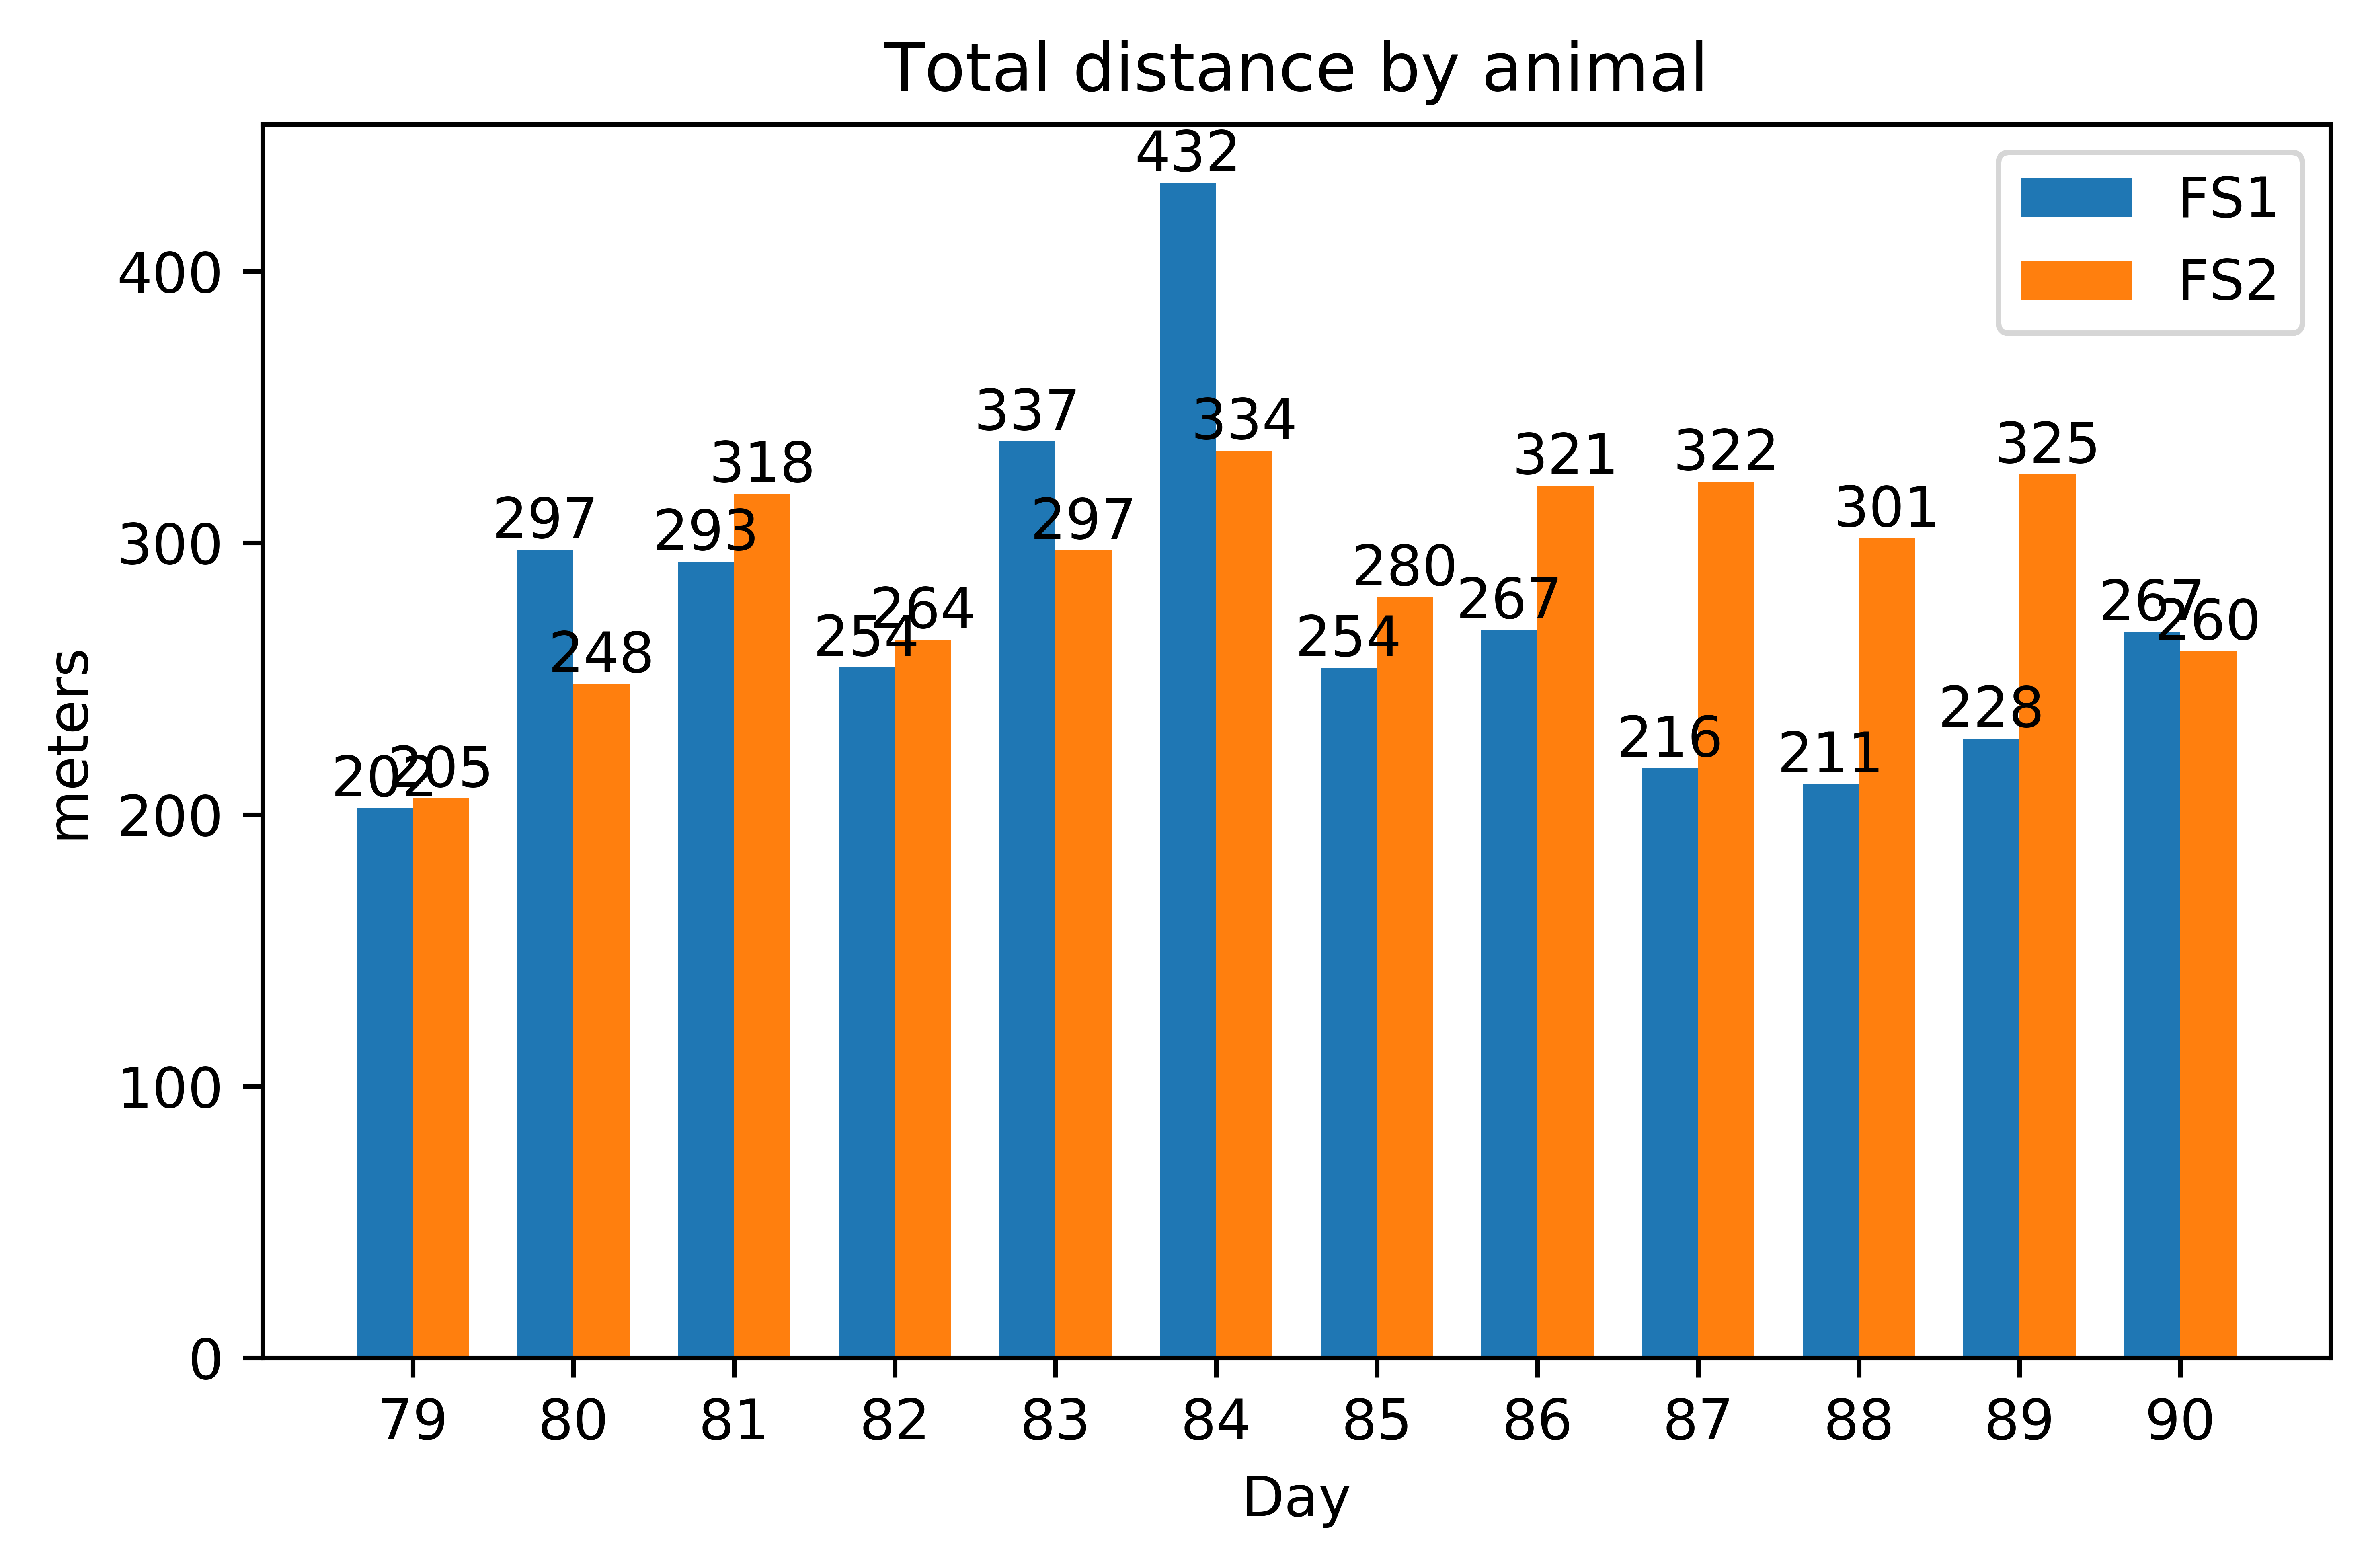

In [11]:
list_of_days = [Day79_fs1,Day80_fs1,Day81_fs1,Day82_fs1,Day83_fs1,Day84_fs1,Day85_fs1,Day86_fs1,Day87_fs1,Day88_fs1,Day89_fs1,Day90_fs1]
list_of_days2 = [Day79_fs2,Day80_fs2,Day81_fs2,Day82_fs2,Day83_fs2,Day84_fs2,Day85_fs2,Day86_fs2,Day87_fs2,Day88_fs2,Day89_fs2,Day90_fs2]
Day_number_list =['79','80','81','82','83','84','85','86','87','88','89','90']
Distance_over_days(list_of_days, list_of_days2, Day_number_list)

### Plot mean speed

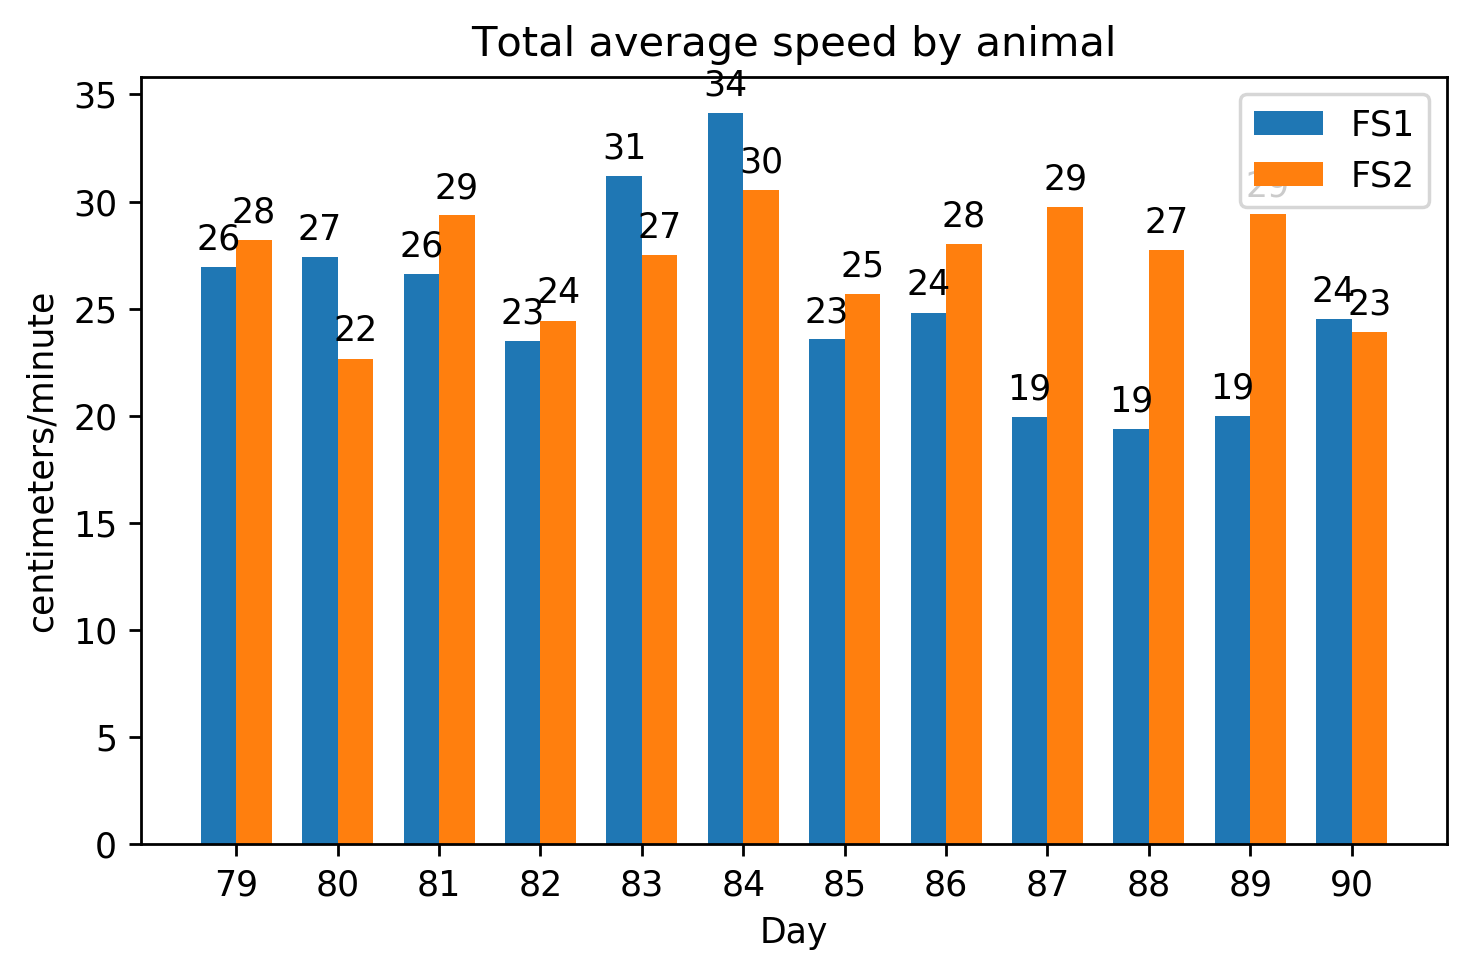

In [12]:
list_of_days = [Day79_fs1,Day80_fs1,Day81_fs1,Day82_fs1,Day83_fs1,Day84_fs1,Day85_fs1,Day86_fs1,Day87_fs1,Day88_fs1,Day89_fs1,Day90_fs1]
list_of_days2 = [Day79_fs2,Day80_fs2,Day81_fs2,Day82_fs2,Day83_fs2,Day84_fs2,Day85_fs2,Day86_fs2,Day87_fs2,Day88_fs2,Day89_fs2,Day90_fs2]
Day_number_list =['79','80','81','82','83','84','85','86','87','88','89','90']
#Distance_over_days(list_of_days, list_of_days2, Day_number_list)

def Speed_over_days (list_of_fs1_days,list_of_fs2_days,list_of_number_of_days) :
    """this function takes lists of days for each animal and plots the averge speed for a day over given days. """
    
    LT_distance_fs1 = []
    for day in list_of_fs1_days:
        LT_distance_fs1.append (100*calculateSpeed(list(day[1]),list(day[3]),0.01)) #*100 to get to cm 
    
    LT_distance_fs2 = []
    for day in list_of_fs2_days:
        LT_distance_fs2.append (100*calculateSpeed(list(day[1]),list(day[3]), 0.01))
    
    x = np.arange(len(list_of_number_of_days))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(dpi= 250)
    FS1 = ax.bar(x - width/2, LT_distance_fs1, width, label='FS1')
    FS2 = ax.bar(x + width/2, LT_distance_fs2, width, label='FS2')

   
    ax.set_ylabel('centimeters/minute')
    ax.set_xlabel('Day')
    ax.set_title('Total average speed by animal')
    ax.set_xticks(x)
    ax.set_xticklabels(list_of_number_of_days)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(int(height)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(FS1)
    autolabel(FS2)

    fig.tight_layout()
    plt.savefig(figures+'speed_over_days_mean_'+Day_number_list[0]+'-'+Day_number_list[-1]+'.png', dpi = 1000)
    plt.show()
    
Speed_over_days(list_of_days, list_of_days2, Day_number_list) 

### But now with median of speed!! 

In [15]:



def calculateSpeed(x,y,time): 
    travel=0
    speed=[] 
    for i in range(len(y)-1):
        dist = math.sqrt((x[0+i] - x[1+i])**2 + (y[0+i] - y[1+i])**2)/time
        speed.append(dist)   
    return (np.median(speed)) 

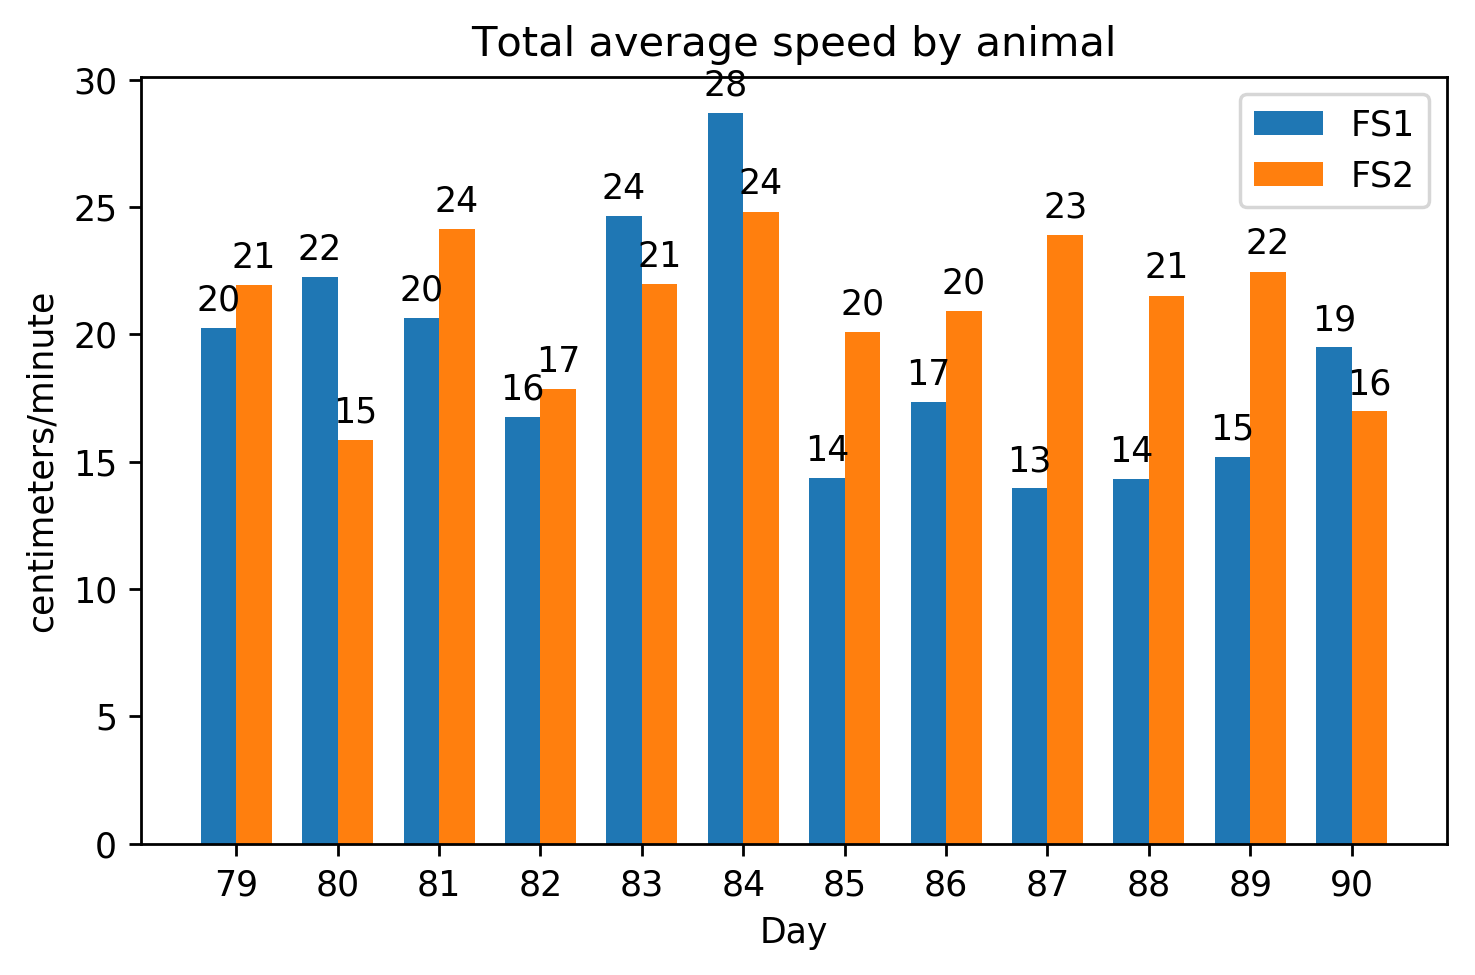

In [17]:
list_of_days = [Day79_fs1,Day80_fs1,Day81_fs1,Day82_fs1,Day83_fs1,Day84_fs1,Day85_fs1,Day86_fs1,Day87_fs1,Day88_fs1,Day89_fs1,Day90_fs1]
list_of_days2 = [Day79_fs2,Day80_fs2,Day81_fs2,Day82_fs2,Day83_fs2,Day84_fs2,Day85_fs2,Day86_fs2,Day87_fs2,Day88_fs2,Day89_fs2,Day90_fs2]
Day_number_list =['79','80','81','82','83','84','85','86','87','88','89','90']
#Distance_over_days(list_of_days, list_of_days2, Day_number_list)

def Speed_over_days (list_of_fs1_days,list_of_fs2_days,list_of_number_of_days) :
    """this function takes lists of days for each animal and plots the averge speed for a day over given days. """
    
    LT_distance_fs1 = []
    for day in list_of_fs1_days:
        LT_distance_fs1.append (100*calculateSpeed(list(day[1]),list(day[3]),.01))
    
    LT_distance_fs2 = []
    for day in list_of_fs2_days:
        LT_distance_fs2.append (100*calculateSpeed(list(day[1]),list(day[3]),.01))
    
    x = np.arange(len(list_of_number_of_days))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(dpi= 250)
    FS1 = ax.bar(x - width/2, LT_distance_fs1, width, label='FS1')
    FS2 = ax.bar(x + width/2, LT_distance_fs2, width, label='FS2')

   
    ax.set_ylabel('centimeters/minute')
    ax.set_xlabel('Day')
    ax.set_title('Total average speed by animal')
    ax.set_xticks(x)
    ax.set_xticklabels(list_of_number_of_days)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(int(height)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(FS1)
    autolabel(FS2)

    fig.tight_layout()
    plt.savefig(figures+'speed_over_days_median_'+Day_number_list[0]+'-'+Day_number_list[-1]+'.png', dpi = 100)
    plt.show()
    
Speed_over_days(list_of_days, list_of_days2, Day_number_list) 

## Fixed, the speed issue, was taking each time over and over so it was exponentially adding the times 

# DISCLAIMER: Probably will need to cut off the first little bit to get a better average, due to the recording starting when the rat is being placed inside the arena, ALSO times counted with numpy every .01sec - not taking the recording times - hence imprecise  

## Was I calculatign speed all wrong this time?  YES